This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical) BALANCE : Balance amount left in their account to make purchases ( BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) PURCHASES : Amount of purchases made from account ONEOFF_PURCHASES : Maximum purchase amount done in one-go INSTALLMENTS_PURCHASES : Amount of purchase done in installment CASH_ADVANCE : Cash in advance given by the user PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) CASHADVANCEFREQUENCY : How frequently the cash in advance being paid CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" PURCHASES_TRX : Numbe of purchase transactions made CREDIT_LIMIT : Limit of Credit Card for user PAYMENTS : Amount of Payment done by user MINIMUM_PAYMENTS : Minimum amount of payments made by user PRCFULLPAYMENT : Percent of full payment paid by user TENURE : Tenure of credit card service for user

In [1]:
import sklearn.datasets as datasets
import pandas as pandas
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X=pandas.read_csv('CCGENERAL.csv', sep = ',')
X=X.drop(columns='CUST_ID')
X.head()
X['BALANCE'].hist()

In [2]:
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import Imputer
#Imputar a la columns 
imputer=Imputer(missing_values='NaN', strategy='mean')
transformed_values = imputer.fit_transform(X.values)
X2=pandas.DataFrame(transformed_values )
X2.columns=X.columns
X=X2
X.head()

C:\Users\gh05479\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, max_iter=200)
estimator=kmeans.fit(X)
estimator=kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, estimator)
silhouette_avg

0.46510840738141906

[-279296583114.4999, -206553937443.41513, -161535690225.2456, -132875816937.78352]


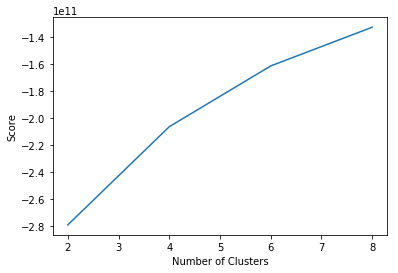

In [11]:
#Para cada k hacer
Nc = range(2, 10, 2)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
p=pca.fit(X)  
Y = pca.transform(X)

x=Y.transpose()[0]
y=Y.transpose()[1]

pca.components_

array([[ 2.91520886e-01,  8.37060360e-06,  2.92697063e-01,
         2.10847108e-01,  8.18443400e-02,  2.16284190e-01,
         1.29573393e-05,  2.27451326e-05,  8.44725248e-06,
         1.02148816e-05,  4.04619005e-04,  2.34107162e-03,
         6.90109285e-01,  4.87428470e-01,  1.32541190e-01,
         2.30860179e-06,  3.92669268e-05],
       [-3.00679738e-01, -4.25285620e-06,  5.00842233e-01,
         3.80377585e-01,  1.20504679e-01, -2.04398308e-01,
         3.71026793e-05,  2.84330732e-05,  3.02318099e-05,
        -1.93683869e-05, -5.03675263e-04,  3.51702459e-03,
        -4.47352816e-01,  4.70277881e-01, -1.90953255e-01,
         2.57018536e-05,  3.21101997e-06]])

C:\Users\gh05479\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


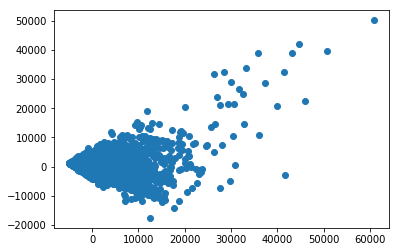

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax=ax.plot(x,y,'o')

fig.show()